In [5]:
# Pymol was used to create separate glycan pdbs from original structure
# ChimeraX was used to color the structures 

# Import libraries 
import csv 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
from colour import Color


In [6]:
# File columns - site, 
s = 0
p = 1
u = 2
c = 3 
h = 4

# Sites number and corresponding PDB files 
location = {'17': '#1 , 25 , 48',
 '61': '#2 , 26 , 49',
 '74': '#3 , 27 , 50',
 '122': '#4 , 28 , 51',
 '149': '#5 , 29 , 52',
 '165': '#6 , 30 , 53',
 '234': '#7 , 31 , 54',
 '282': '#8 , 32 , 55',
 '331': '#9 , 33 , 56',
 '343': '#10 , 34 , 57',
 '603': '#11 , 35 , 58',
 '616': '#12 , 36 , 59',
 '657': '#13 , 37 , 60',
 '709': '#14 , 38 , 61',
 '717': '#15 , 39 , 62',
 '801': '#16 , 40 , 63',
 '1074': '#17 , 41 , 64',
 '1098': '#18 , 42 , 65',
 '1134': '#19 , 43 , 66',
 '1158': '#20 , 44 , 67',
 '1173': '#21 , 45 , 68',
 '1194': '#22 , 46 , 69'}

# Custom colors for magenta green comparison
light_gray = "#ECECEC"
red = "#EA3323"
remove = ""
yellow = "#FFFF55"
magenta = "#EB51F7"
green = "#4FAD5B"

# Color red beige spectrum for occupancy 
rbspec = ["#EA3323", "#ECB3BC", "#4FAD5B", "#50B0DB", "#1001B4"]

# List of experiments to compare and customize certain sites 
complist = [
    # [ Experiment name, name, [color/remove, sites ... ] ]
    ["Wuhan_6PMut7", "Lambda_6PMut7", [light_gray, 709, 717, 1134], [remove, 74]],
    ["Wuhan_6PMut7", "Alpha_6PMut7", [light_gray, 709, 717, 1134]],
    ["Wuhan_6PMut7", "Gamma_6PMut7", [light_gray, 709, 717, 1134], ["#6A2D6C", 17]],
    ["Wuhan_6PMut7", "Omicron_6PMut7", [light_gray, 709, 717, 1134]],
    ["Wuhan_6PMut7", "Beta_6PMut7", [light_gray, 709, 717, 1134]],
    ["Wuhan_6PMut7", "Delta_6PMut7", [light_gray, 709, 717, 1134], [remove, 17]],
    ["Wuhan_6PMut7", "Mu_6PMut7", [light_gray, 709, 717, 1134]],
]

# List of experiments and customize certain sites for magenta green 
myg_list = [
    # [ Experiment name, [color/remove, sites ... ] ]
    ["Alpha_6PMut7", [light_gray, 709, 717, 1134]], 
    ["Gamma_6PMut7", [light_gray, 709, 717, 1134]], 
    ["Omicron_6PMut7", [light_gray, 709, 717, 1134]], 
    ["Beta_6PMut7", [light_gray, 709, 717, 1134]], 
    ["Lambda_6PMut7", [light_gray, 709, 717, 1134]], 
    ["Mu_6PMut7", [light_gray, 709, 717, 1134]], 
    ["Delta_6PMut7", [light_gray, 709, 717, 1134]], 
    ["Wuhan_6PMut7", [light_gray, 709, 717, 1134]]
]


# List of experiments and customize certain sites for red beige 
rblist = [
    # Title, title, light gray 
    ["Wuhan_6PMut7", "Mu_6PMut7", [709, 717, 1134]]
]

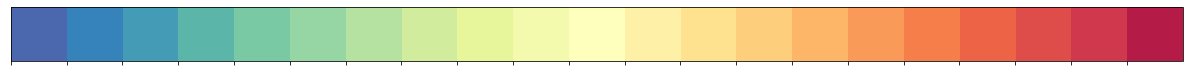

In [7]:
# Creating the colour spectrum used in the point difference structure
bar = sns.palplot(sns.color_palette("Spectral_r", 21))
#print(rgb_colors.as_hex())
rgb_colors = sns.color_palette("Spectral_r", 21)
spec = rgb_colors.as_hex()

In [8]:
# Read data file no. m. Return 2D list containing data 
def  reader(m) : 
    # Open file
    file = open("csv/"+m+'_forAvg.csv')
    csvreader = csv.reader(file)
  
    header = []
    header = next(csvreader)
    
    # Put each row of data in list 
    rows = []
    for row in csvreader:
        # Skip if site row has no data 
        if (row[1] != '' and row[1] != '0') :
            for i,x in enumerate (row) : 
                if (i): 
                    row[i] = float(x)
            rows.append(row)        
    file.close() 
    return rows

In [9]:
# Return list of sites present in structure no. m
def sites(m) : 
    
    file = open("csv/"+m+'_forAvg.csv')
    csvreader = csv.reader(file)

    header = []
    header = next(csvreader)
    #print(header)
    
    rows = []
    for row in csvreader:
        if (row[1] != '' and row[1] != '0') :
            rows.append(row[0])

    file.close()
    return rows

In [10]:
# Colour glycan at location l to colour c 
def color(l, c):
    print ("show "+l+" surface")
    print ("show "+l)
    print ("style "+l+" sphere")
    print ("color "+l+' '+c+" transparency 0")

In [24]:
# Print commands to 
def myg (m, y) :
    colors = ["#EB51F7", "#EF8BF9", "#FFFF55", "#A0CE63", "#4FAD5B", "#4FAD5B"]
    
    rows = reader(m)
    for x in  (rows) : 
        # Probability of high mannose * 5 colour options 
        temp = (x[h] / (x[h] + x[c]))*5
        i = int (temp)
        
        
        if x[s] in location : 
            color(location[x[s]], colors[i])
            
    for temp in y : 
        for x in temp[1:]:
            if (temp[0] != remove):
                color(location[str(x)], temp[0])
            else : 
                print("hide ", location[str(x)])
                print("hide ", location[str(x)], "surface")

    print("save MYG_"+m+" format png transparentBackground true")

In [12]:
def rb (a, b, c) : 
    
    wt = reader(a)
    mod = reader(b)
    inmod = sites(b)
    
    spec = rbspec
            
    for n, x in  enumerate (wt) : 
        if (x[s] in location): 
            if (x[s] in inmod):
                j = inmod.index(x[s])
                temp = 100 + mod[j][u] - wt[n][u]
                if (temp < 40) : 
                    color(location[x[s]], spec[0])
                elif (temp < 80) : 
                    color(location[x[s]], spec[1])
                elif (temp < 120) : 
                    color(location[x[s]], spec[2])
                elif (temp < 160) : 
                    color(location[x[s]], spec[3])
                else : 
                    color(location[x[s]], spec[4])
            else : 
                color(location[x[s]], "grey")
    
    for temp in c : 
        color(location[str(temp)], light_gray) 
            
    print("save "+a+"_"+b+"_unoccupancy format png transparentBackground true")
    

show #1 , 25 , 48 surface
show #1 , 25 , 48
style #1 , 25 , 48 sphere
color #1 , 25 , 48 #4FAD5B transparency 0
show #2 , 26 , 49 surface
show #2 , 26 , 49
style #2 , 26 , 49 sphere
color #2 , 26 , 49 #4FAD5B transparency 0
show #3 , 27 , 50 surface
show #3 , 27 , 50
style #3 , 27 , 50 sphere
color #3 , 27 , 50 #4FAD5B transparency 0
show #4 , 28 , 51 surface
show #4 , 28 , 51
style #4 , 28 , 51 sphere
color #4 , 28 , 51 #4FAD5B transparency 0
show #5 , 29 , 52 surface
show #5 , 29 , 52
style #5 , 29 , 52 sphere
color #5 , 29 , 52 #50B0DB transparency 0
show #6 , 30 , 53 surface
show #6 , 30 , 53
style #6 , 30 , 53 sphere
color #6 , 30 , 53 #4FAD5B transparency 0
show #7 , 31 , 54 surface
show #7 , 31 , 54
style #7 , 31 , 54 sphere
color #7 , 31 , 54 #4FAD5B transparency 0
show #8 , 32 , 55 surface
show #8 , 32 , 55
style #8 , 32 , 55 sphere
color #8 , 32 , 55 #4FAD5B transparency 0
show #9 , 33 , 56 surface
show #9 , 33 , 56
style #9 , 33 , 56 sphere
color #9 , 33 , 56 #4FAD5B transpa

In [37]:
# Function to calculate point difference between a & b, and print commands  
def average(a, b, c) : 
    
    wt = reader(a)
    mod = reader(b)
    inmod = sites(b)
    
    for i, x in  enumerate (wt) : 
        #x[s] is site number of column x 
        # Check if we have pdb files for site number x[s]
        if (x[s] in location): 
            # Check if second experiment also has site number x[s]
            if (x[s] in inmod):
                # j is index of site number x[s] in second experiment file 
                j = inmod.index(x[s]) 
                # temp = (high mannose value in second exp. - first exp.)
                percent = mod[j][h] - wt[i][h]
                # temp is percentage difference. Divide by 10 for point diff. 
                # Point diff. values should be between -10 and 10.
                point = percent/10
                # Convert to int and shift by 10 to get corresponding index in spectrum 
                index = int(point) + 10
                color(location[x[s]], spec[index])
                
    for temp in c : 
        for x in temp[1:]:
            if (temp[0] != remove):
                color(location[str(x)], temp[0])
            else : 
                print("hide ", location[str(x)])
                print("hide ", location[str(x)], "surface")
    

In [29]:
# Function to calculate point difference between a & b, and print commands  
def point(a, b, c) : 
    
    wt = reader(a)
    mod = reader(b)
    inmod = sites(b)
    
    for i, x in  enumerate (wt) : 
        #x[s] is site number of column x 
        # Check if we have pdb files for site number x[s]
        if (x[s] in location): 
            # Check if second experiment also has site number x[s]
            if (x[s] in inmod):
                # j is index of site number x[s] in second experiment file 
                j = inmod.index(x[s]) 
                # temp = (high mannose value in second exp. - first exp.)
                percent = mod[j][h] - wt[i][h]
                # temp is percentage difference. Divide by 10 for point diff. 
                # Point diff. values should be between -10 and 10.
                point = percent/10
                # Convert to int and shift by 10 to get corresponding index in spectrum 
                index = int(point) + 10
                color(location[x[s]], spec[index])
            else : 
                color(location[x[s]], "grey")
                
    for temp in c : 
        for x in temp[1:]:
            if (temp[0] != remove):
                color(location[str(x)], temp[0])
            else : 
                print("hide ", location[str(x)])
                print("hide ", location[str(x)], "surface")
        
    print("save Diff_"+a+"_"+b+" format png transparentBackground true")
    

In [14]:
# Function to print the colour of each site for manual checking
# in the red-beige structure 
def state_rb () : 
    red = Color("beige")
    colors = list(red.range_to(Color("red"),101))

    for x in  (rows) : 
        temp = x[u]
        i = int (temp)
        print(x[s], i, colors[i].hex)
        

In [ ]:
# Print commands to clear original visualisation
def start() :
    print ("style all ball\n",
           "show all surfaces\n",
           "color all grey transparency 0\n",
       "surface transparency 65\n",
          "hide all surface;", 
           "hide all;",
          "hide /M; show /A,B,C surface; show /A,B,C")
    
    print("view orient")
    print ("turn angle -85 axis x; turn angle 220 axis y; view all")
    

    

    


In [16]:
# Function to hide all glycans and remove any colouring 
def clear (): 
    for x in range(1, 71) : 
        print ("color #"+str(x)+" grey")
        print ("hide #"+str(x)+" surface")
        print ("style #"+str(x)+" ball")
        print ("hide #"+str(x)+" surface")
        print ("hide #"+str(x)) 



In [17]:
# Color whole structure hex color

def color_all (col): 
    
    for x in  (location) : 
        color(location[x], col)
    print("save allcolored format png transparentBackground true")

In [19]:
""" 
Function to print the difference of each site in first and second structure for manual checking in the point 
difference structure
""" 
def state_compare(m1, m2) :
    
    wt = reader(m1)
    mod = reader(m2)
    inmod = comp_reader(m2)

    for n, x in  enumerate (wt) : 
        if  (x[s] in inmod):
            j = inmod.index(x[s])
            temp = mod[j][h] - wt[n][h]
            i = int (temp/10) + 10
            print(inmod[j], mod[j][s], wt[n][s])
            print(mod[j][h], wt[n][h], mod[j][h] - wt[n][h], i-10, i)
            print(inmod[j], spec[i])

In [20]:
# Function to print the colour of each site for manual checking
# in the magenta-green structure 
def state_myg () :
    colours = ["#EB51F7", "#EF8BF9", "#FFFF55", "#A0CE63", "#4FAD5B", "#4FAD5B"]
    
    print(m)
    
    for x in  (rows) : 
        temp = (x[h] / (x[h] + x[c]))*100
        i = int (temp)
 
        # Should change such that colours[i] corresponds to correct color 
        # Remove all the if statements later 
        if temp < 20 : 
            print(x[s], "pink", colours[0])
        elif temp < 40 : 
            print(x[s], "light pink", colours[1])
        elif temp < 60 : 
            print(x[s], "yellow", colours[2])
        elif temp < 80 : 
            print(x[s], "light green", colours[3])
        else :
            print(x[s], "green", colours[4])

            